<a href="https://colab.research.google.com/github/obabilonia/test1/blob/master/octave1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade1

Como criterio de escolha do coeficiente de regularizacao e usando o conjunto de validacao:
(1) Monitorar o erro quadratico; (2) Monitorar a taxa de acerto:1
Valor do coeficiente de regularizacao = 64
EQ de validacao = 4663.3
EQ de teste = 3827.78
Taxa de acerto - Treinamento = 0.857083
Taxa de acerto - Validacao = 0.855083
Taxa de acerto - Teste = 0.8604
Taxa de acerto por classe
ans =

   1.00000   0.83008
   2.00000   0.91295
   3.00000   0.84579
   4.00000   0.82080
   5.00000   0.88544
   6.00000   0.88105
   7.00000   0.86217
   8.00000   0.84022
   9.00000   0.84342
   0.00000   0.90316

Apresente toda resposta entre aspas simples
Quais sao os dois digitos mais faceis de classificar?'2''0'
Quais sao os dois digitos mais dificeis de classificar?'4''1'
Quais sao os dois digitos que mais recebem classificacao errada de digitos da classe #9?'4''7'
O grafico da Figura 3 a seguir plota os coeficientes obtidos para cada classificador
Explique como usar cada imagem da Figura 3 para se ob

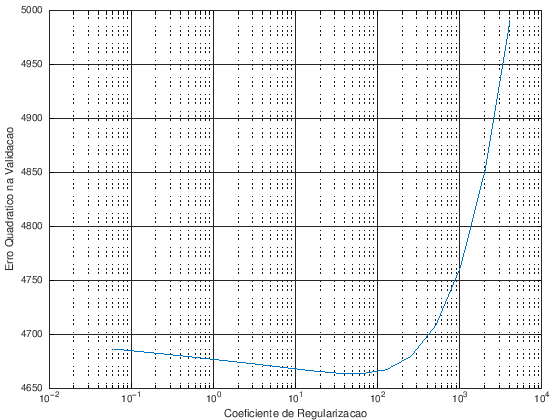

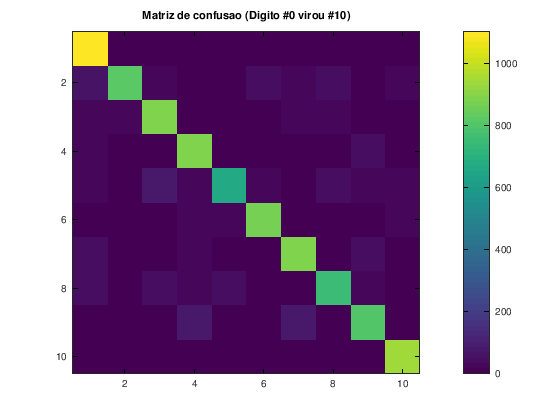

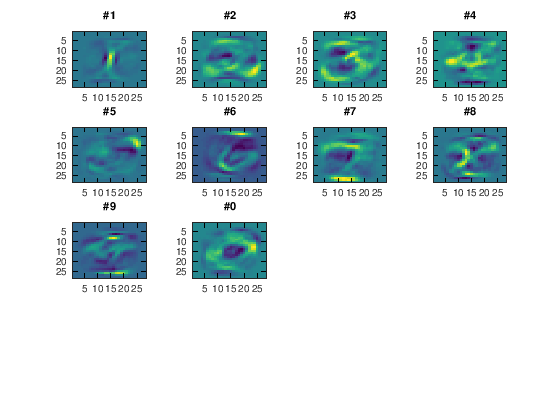

In [0]:
# % FEEC/Unicamp
% 25/10/2018
% Classificação linear para os dados MNIST usando Ridge Regression
% Pode-se monitorar o erro quadrático junto ao conjunto de validação
% ou monitorar a taxa de acerto junto ao conjunto de validação
clear all;
rand('seed', 1500); % Força o gerador de números pseudo-aleatórios a gerar a mesma sequência
disp('Como criterio de escolha do coeficiente de regularizacao e usando o conjunto de validacao:');
opcao = input('(1) Monitorar o erro quadratico; (2) Monitorar a taxa de acerto: ');
if opcao ~= 1 && opcao ~= 2,
    error('Opcao invalida!');
end
load data; % Carrega os dados de treinamento e validação
load test; % Carrega os dados de teste
[N,m] = size(X);
X = [ones(N,1) X]; % Acrescenta-se uma coluna de 1's
[Nt,mt] = size(Xt);
N_classes = length(S(1,:));
Xt = [ones(Nt,1) Xt]; % Acrescenta-se uma coluna de 1's
new_order = randperm(N); % Define uma permutação de inteiros de 1 a N
X = X(new_order,:); % Embaralha os dados de treinamento e validação
S = S(new_order,:);
part = 0.8;
Xtr = X(1:(part*N),:); % Toma os 80% primeiros para treinamento
Xv = X((part*N+1):N,:); % Toma os 20% últimos para validação
Str = S(1:(part*N),:);
Sv = S((part*N+1):N,:);
v_c = [];
v_EQ = [];
EQ_min = 10^30;
v_tx_acerto = [];
tx_acerto_max = 0;
for p=-4:1:12, % Esse intervalo de busca deve ser ajustado a cada aplicação
    c = 2^p; % Varia o coeficiente de regularização em potência de 2
    w = (Xtr'*Xtr+c*eye(m+1))\Xtr'*Str; % Encontra os parâmetros dos 10 classificadores lineares
    S_est = Xv*w; % Obtém a saída para os dados de validação
    if opcao == 1,
        EQ = sum(sum((Sv-S_est).^2)); % Calcula o erro quadrático de validação
        v_c = [v_c;c];
        v_EQ = [v_EQ;EQ];
        if EQ <= EQ_min, % Armazena o melhor desempenho junto aos dados de validação
            EQ_min = EQ;
            c_min = c;
            w_min = w;
        end
    elseif opcao == 2,
        acerto = 0;
        for i=1:(0.2*N),
            [vmax,indmax] = max(S_est(i,:));
            if Sv(i,indmax) > 0.5,
                acerto = acerto+1;
            end
        end
        tx_acerto = acerto/(0.2*N);
        v_c = [v_c;c];
        v_tx_acerto = [v_tx_acerto;tx_acerto];
        if tx_acerto >= tx_acerto_max,
            tx_acerto_max = tx_acerto;
            c_min = c;
            w_min = w;
        end
    end
end
figure(1);
if opcao == 1,
    semilogx(v_c,v_EQ); % Plota o gráfico de [Coeficiente de Regularização] X [Erro Quadrático junto aos Dados de Validação]
    ylabel('Erro Quadratico na Validacao');
elseif opcao == 2,
    semilogx(v_c,v_tx_acerto); % Plota o gráfico de [Coeficiente de Regularização] X [Taxa de Acerto junto aos Dados de Validação]
    ylabel('Taxa de Acerto na Validacao');
end
xlabel('Coeficiente de Regularizacao');grid;
St_est = Xt*w_min; % Obtém a saída para os dados de teste
EQt = sum(sum((St-St_est).^2)); % Calcula o erro quadrático de teste
fprintf('Valor do coeficiente de regularizacao = %g\n',c_min);
if opcao == 1,
    fprintf('EQ de validacao = %g\n',EQ_min);
elseif opcao == 2,
    fprintf('Taxa de acerto de validacao = %g\n',tx_acerto_max);
end
fprintf('EQ de teste = %g\n',EQt);
% Apresentação, a seguir, do desempenho em termos da taxa de acerto na
% classificação, para os três conjuntos, sempre usando o classificador que
% minimizou o EQ junto aos conjunto de validação.
acerto = 0;
S_est = Xtr*w_min;
for i=1:(0.8*N),
    [vmax,indmax] = max(S_est(i,:));
    if Str(i,indmax) > 0.5,
        acerto = acerto+1;
    end
end
fprintf('Taxa de acerto - Treinamento = %g\n',acerto/(0.8*N));
acerto = 0;
S_est = Xv*w_min;
for i=1:(0.2*N),
    [vmax,indmax] = max(S_est(i,:));
    if Sv(i,indmax) > 0.5,
        acerto = acerto+1;
    end
end
fprintf('Taxa de acerto - Validacao = %g\n',acerto/(0.2*N));
acerto = 0;
S_est = Xt*w_min;
for i=1:Nt,
    [vmax,indmax] = max(S_est(i,:));
    if St(i,indmax) > 0.5,
        acerto = acerto+1;
    end
end
fprintf('Taxa de acerto - Teste = %g\n',acerto/Nt);
% Obtendo a taxa de acerto por classe
erros = zeros(N_classes,1);
n_amostras_classes = zeros(N_classes,1);
mat_conf = zeros(N_classes,N_classes);
for i=1:Nt,
    [vmax,indmax] = max(S_est(i,:));
    if St(i,indmax) < 0.5,
        erros(indmax,1) = erros(indmax,1)+1;
    end
    n_amostras_classes(indmax,1) = n_amostras_classes(indmax,1)+1;
    [vmax2,indmax2] = max(St(i,:));
    mat_conf(indmax2,indmax) = mat_conf(indmax2,indmax)+1;
end
taxa_acerto_por_classe = 1-(erros./n_amostras_classes);
disp('Taxa de acerto por classe');
[[1:9 0]' taxa_acerto_por_classe]
disp('Apresente toda resposta entre aspas simples');
input('Quais sao os dois digitos mais faceis de classificar? ');
input('Quais sao os dois digitos mais dificeis de classificar? ');
figure(2);
imagesc(mat_conf);
colorbar;
title('Matriz de confusao (Digito #0 virou #10)');
input('Quais sao os dois digitos que mais recebem classificacao errada de digitos da classe #9? ');
disp('O grafico da Figura 3 a seguir plota os coeficientes obtidos para cada classificador');
figure(3);
colormap('default');
for i=1:10,
    subplot(4,4,i);
    param_class = reshape(w(2:(m+1),i),[28,28]);
    imagesc(param_class);
    if i<10,
        title(sprintf('#%d',i));
    else
        title(sprintf('#%d',0));
    end
end
disp('Explique como usar cada imagem da Figura 3 para se obter a classe de um digito recebido na entrada.');

# Atividade 2

Como criterio de escolha do coeficiente de regularizacao e usando o conjunto de validacao:
(1) Monitorar o erro quadratico; (2) Monitorar a taxa de acerto:1
Numero de neuronios na camada intermediaria (Sugestao: 500) =500
Valor do coeficiente de regularizacao = 16
EQ de validacao = 3490.47
EQ de teste = 2805.44
Taxa de acerto - Treinamento = 0.913875
Taxa de acerto - Validacao = 0.910167
Taxa de acerto - Teste = 0.9163
Taxa de acerto por classe
ans =

   1.00000   0.94835
   2.00000   0.93949
   3.00000   0.89244
   4.00000   0.90307
   5.00000   0.90909
   6.00000   0.91278
   7.00000   0.91098
   8.00000   0.90085
   9.00000   0.90293
   0.00000   0.93615

Apresente toda resposta entre aspas simples
Quais sao os dois digitos mais faceis de classificar?'1''2'
Quais sao os dois digitos mais dificeis de classificar?'3''8'
Quais sao os tres digitos que mais recebem classificacao errada de digitos da classe #7?'1''2''9'


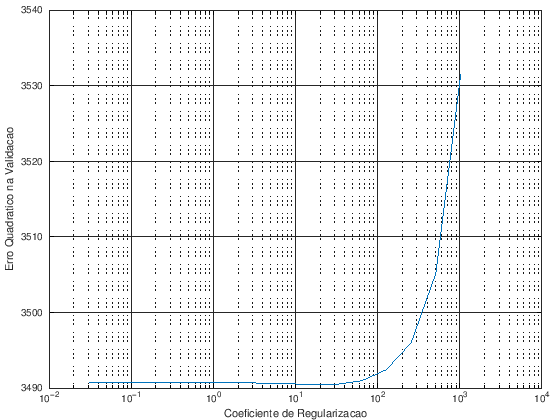

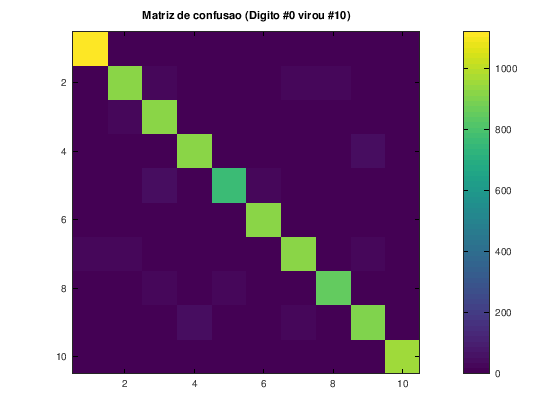

In [0]:


% FEEC/Unicamp
% 25/10/2018
% Classificação por ELM para os dados MNIST usando Ridge Regression
% Pode-se monitorar o erro quadrático junto ao conjunto de validação
% ou monitorar a taxa de acerto junto ao conjunto de validação
clear all;
rand('seed', 1500); % Força o gerador de números pseudo-aleatórios a gerar a mesma sequência
randn('seed', 1500); % Força o gerador de números pseudo-aleatórios a gerar a mesma sequência
disp('Como criterio de escolha do coeficiente de regularizacao e usando o conjunto de validacao:');
opcao = input('(1) Monitorar o erro quadratico; (2) Monitorar a taxa de acerto: ');
if opcao ~= 1 && opcao ~= 2,
    error('Opcao invalida!');
    
end
load data; % Carrega os dados de treinamento e validação
load test; % Carrega os dados de teste
[N,m] = size(X);
X = [ones(N,1) X]; % Acrescenta-se uma coluna de 1's
[Nt,mt] = size(Xt);
N_classes = length(S(1,:));
Xt = [ones(Nt,1) Xt]; % Acrescenta-se uma coluna de 1's
new_order = randperm(N); % Define uma permutação de inteiros de 1 a N
X = X(new_order,:); % Embaralha os dados de treinamento e validação
S = S(new_order,:);
part = 0.8;
Xtr = X(1:(part*N),:); % Toma os 80% primeiros para treinamento
Xv = X((part*N+1):N,:); % Toma os 20% últimos para validação
Str = S(1:(part*N),:);
Sv = S((part*N+1):N,:);
nhidden = input('Numero de neuronios na camada intermediaria (Sugestao: 500) = ');
w1 = 0.2*randn(nhidden,m+1);
Ytr = [ones(0.8*N,1) tanh(Xtr*w1')];
Yv = [ones(0.2*N,1) tanh(Xv*w1')];
Yt = [ones(Nt,1) tanh(Xt*w1')];
v_c = [];
v_EQ = [];
EQ_min = 10^30;
v_tx_acerto = [];
tx_acerto_max = 0;
for p=-5:1:10, % Esse intervalo de busca deve ser ajustado a cada aplicação
    c = 2^p; % Varia o coeficiente de regularização em potência de 2
    w = (Ytr'*Ytr+c*eye(nhidden+1))\Ytr'*Str; % Encontra os pesos das 10 saídas da ELM
    S_est = Yv*w; % Obtém a saída para os dados de validação
    if opcao == 1,
        EQ = sum(sum((Sv-S_est).^2)); % Calcula o erro quadrático de validação
        v_c = [v_c;c];
        v_EQ = [v_EQ;EQ];
        if EQ <= EQ_min, % Armazena o melhor desempenho junto aos dados de validação
            EQ_min = EQ;
            c_min = c;
            w_min = w;
        end
    elseif opcao == 2,
        acerto = 0;
        for i=1:(0.2*N),
            [vmax,indmax] = max(S_est(i,:));
            if Sv(i,indmax) > 0.5,
                acerto = acerto+1;
            end
        end
        tx_acerto = acerto/(0.2*N);
        v_c = [v_c;c];
        v_tx_acerto = [v_tx_acerto;tx_acerto];
        if tx_acerto >= tx_acerto_max,
            tx_acerto_max = tx_acerto;
            c_min = c;
            w_min = w;
        end
    end
end
figure(1);
if opcao == 1,
    semilogx(v_c,v_EQ); % Plota o gráfico de [Coeficiente de Regularização] X [Erro Quadrático junto aos Dados de Validação]
    ylabel('Erro Quadratico na Validacao');
elseif opcao == 2,
    semilogx(v_c,v_tx_acerto); % Plota o gráfico de [Coeficiente de Regularização] X [Taxa de Acerto junto aos Dados de Validação]
    ylabel('Taxa de Acerto na Validacao');
end
xlabel('Coeficiente de Regularizacao');grid;
St_est = Yt*w_min; % Obtém a saída para os dados de teste
EQt = sum(sum((St-St_est).^2)); % Calcula o erro quadrático de teste
fprintf('Valor do coeficiente de regularizacao = %g\n',c_min);
if opcao == 1,
    fprintf('EQ de validacao = %g\n',EQ_min);
elseif opcao == 2,
    fprintf('Taxa de acerto de validacao = %g\n',tx_acerto_max);
end
fprintf('EQ de teste = %g\n',EQt);
% Apresentação, a seguir, do desempenho em termos da taxa de acerto na
% classificação, para os três conjuntos, sempre usando o classificador que
% minimizou o EQ junto aos conjunto de validação.
acerto = 0;
S_est = Ytr*w_min;
for i=1:(0.8*N),
    [vmax,indmax] = max(S_est(i,:));
    if Str(i,indmax) > 0.5,
        acerto = acerto+1;
    end
end
fprintf('Taxa de acerto - Treinamento = %g\n',acerto/(0.8*N));
acerto = 0;
S_est = Yv*w_min;
for i=1:(0.2*N),
    [vmax,indmax] = max(S_est(i,:));
    if Sv(i,indmax) > 0.5,
        acerto = acerto+1;
    end
end
fprintf('Taxa de acerto - Validacao = %g\n',acerto/(0.2*N));
acerto = 0;
S_est = Yt*w_min;
for i=1:Nt,
    [vmax,indmax] = max(S_est(i,:));
    if St(i,indmax) > 0.5,
        acerto = acerto+1;
    end
end
fprintf('Taxa de acerto - Teste = %g\n',acerto/Nt);
% Obtendo a taxa de acerto por classe
erros = zeros(N_classes,1);
n_amostras_classes = zeros(N_classes,1);
mat_conf = zeros(N_classes,N_classes);
for i=1:Nt,
    [vmax,indmax] = max(S_est(i,:));
    if St(i,indmax) < 0.5,
        erros(indmax,1) = erros(indmax,1)+1;
    end
    n_amostras_classes(indmax,1) = n_amostras_classes(indmax,1)+1;
    [vmax2,indmax2] = max(St(i,:));
    mat_conf(indmax2,indmax) = mat_conf(indmax2,indmax)+1;
end
taxa_acerto_por_classe = 1-(erros./n_amostras_classes);
disp('Taxa de acerto por classe');
[[1:9 0]' taxa_acerto_por_classe]
disp('Apresente toda resposta entre aspas simples');
input('Quais sao os dois digitos mais faceis de classificar? ');
input('Quais sao os dois digitos mais dificeis de classificar? ');
figure(2);
imagesc(mat_conf);
colorbar;
title('Matriz de confusao (Digito #0 virou #10)');
input('Quais sao os tres digitos que mais recebem classificacao errada de digitos da classe #7? ');


# Atividade 3

In [0]:
import tensorflow as tf
import os
import numpy as np

In [0]:
#mnist = tf.keras.datasets.mnist
#(x_train, y_train),(x_test, y_test) = mnist.load_data()
# load da base e separação em treino e teste
mnist = np.load('mnist.npz')

x_train = mnist['x_train']
y_train = mnist['y_train']

x_test = mnist['x_test']
y_test = mnist['y_test']
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
#modelo com dropout
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)
model_json = model.to_json()
json_file = open("model_MLP.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("model_MLP.h5")
print("Model saved to disk")
os.getcwd()

Epoch 1/5
60000/60000 [==============================] - 33s 554us/step - loss: 0.2002 - acc: 0.9414
Epoch 2/5
60000/60000 [==============================] - 32s 541us/step - loss: 0.0822 - acc: 0.9752
Epoch 3/5
60000/60000 [==============================] - 33s 546us/step - loss: 0.0531 - acc: 0.9827
Epoch 4/5
60000/60000 [==============================] - 32s 535us/step - loss: 0.0362 - acc: 0.9882
Epoch 5/5
10000/10000 [==============================] - 1s 116us/step
Model saved to disk


'C:\\Users\\suzukij\\Desktop\\Atividades\\deep_learning'

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  401920    
_________________________________________________________________
dense_3 (Dense)              multiple                  5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
#modelo sem Dropout
model_2 = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),
#tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_2.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

In [0]:
model_2.fit(x_train, y_train, epochs=5)
model_2.evaluate(x_test, y_test)
model_2_json = model_2.to_json()
json_file = open("model_MLP_s.json", "w")
json_file.write(model_2_json)
json_file.close()
model_2.save_weights("model_MLP_s.h5")
print("Model saved to disk")
os.getcwd()

Epoch 1/5
60000/60000 [==============================] - 33s 555us/step - loss: 0.1998 - acc: 0.9407
Epoch 2/5
60000/60000 [==============================] - 35s 580us/step - loss: 0.0796 - acc: 0.9756
Epoch 3/5
60000/60000 [==============================] - 32s 528us/step - loss: 0.0515 - acc: 0.9836
Epoch 4/5
60000/60000 [==============================] - 33s 546us/step - loss: 0.0373 - acc: 0.9878
Epoch 5/5
10000/10000 [==============================] - 1s 141us/step
Model saved to disk


'C:\\Users\\suzukij\\Desktop\\Atividades\\deep_learning'

In [0]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          multiple                  0         
_________________________________________________________________
dense_18 (Dense)             multiple                  401920    
_________________________________________________________________
dense_19 (Dense)             multiple                  5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# Atividade 4

In [0]:
import tensorflow as tf
import os
#mnist = tf.keras.datasets.mnist
#(x_train, y_train),(x_test, y_test) = mnist.load_data()
mnist = np.load('mnist.npz')

x_train = mnist['x_train']
y_train = mnist['y_train']

x_test = mnist['x_test']
y_test = mnist['y_test']

# reshape to be [samples][width][height][pixels]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train, x_test = x_train / 255.0, x_test / 255.0
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
 activation='relu',
 input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)
model_json = model.to_json()
json_file = open("model_CNN.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("model_CNN.h5")
print("Model saved to disk")
os.getcwd()

Epoch 1/5
60000/60000 [==============================] - 336s 6ms/step - loss: 0.1849 - acc: 0.9435
Epoch 2/5
60000/60000 [==============================] - 624s 10ms/step - loss: 0.0812 - acc: 0.9763
Epoch 3/5
60000/60000 [==============================] - 337s 6ms/step - loss: 0.0624 - acc: 0.9811
Epoch 4/5
60000/60000 [==============================] - 338s 6ms/step - loss: 0.0496 - acc: 0.9847
Epoch 5/5
10000/10000 [==============================] - 15s 2ms/step
Model saved to disk


'C:\\Users\\suzukij\\Desktop\\Atividades\\deep_learning'

# Atividade 5

**Author:** Raoul Malm  

**Description:** 

This notebook demonstrates the future price prediction for different stocks using recurrent neural networks in tensorflow. Recurrent neural networks with basic, LSTM or GRU cells are implemented. 

**Outline:**

1. [Libraries and settings](#1-bullet)
2. [Analyze data](#2-bullet)
3. [Manipulate data](#3-bullet)
4. [Model and validate data](#4-bullet)
5. [Predictions](#5-bullet)

**Reference:**  

[LSTM_Stock_prediction-20170507 by BenF](https://www.kaggle.com/benjibb/lstm-stock-prediction-20170507/notebook)

# 1. Libraries and settings <a class="anchor" id="1-bullet"></a> 

In [0]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));


/home/obabilonia: ['.texmf-var', 'octave-4.4.1', '.bash_logout', '.local', '.vnl', 'gromacs', 'Public', 'colab.ipynb', '.ssh', 'CaSO3.png', '.rasmol', '.dmrc', 'Desktop', 'missfont.log', '2', 'Downloads', 'AP_on_Calcite_surface_final.png', 'BDT-out-1000.pdb~', 'Pictures', 'MachineLearning', '.quantumwise', '.xsession-errors.old', '.gnome', '.thunderbird', 'anaconda3', '.gconf', '.VESTA3-obabilonia:0.pid', '.jupyter', 'Documents', '.bashrc.swp', 'Untitled.ipynb', '.gitconfig', 'Untitled1.ipynb', 'energy-potencial.xvg', '.bashrc-anaconda2.bak', 'Dropbox', 'test_main.py', '.viminfo', 'work', '.bashrc', 'Unconfirmed 356541.crdownload', '.Xauthority', '.x-formation', '.compiz', '.ipynb_checkpoints', 'NA', '1', '.pcsx', '.adobe', 'selenium', 'octave-4.4.1.tar.gz', '.Rhistory', '.mozilla', 'test.pdf', 'AP_on_Calcite_surface_final2.png', 'Templates', '.conda', '.dropbox-dist', '.ninja_ide', 'pexpect-4.6.0.tar.gz', '.mcq_log', '.config', '.rstudio-desktop', '.octave_hist', '.ICEauthority', 'Mus

# 2. Analyze data <a class="anchor" id="2-bullet"></a> 
- load stock prices from prices-split-adjusted.csv
- analyze data

In [0]:
# import all stock prices 
df = pd.read_csv("./ITAu/ZuZu/prices-split-adjusted.csv", index_col = 0)
df.info()
df.head()

# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB

number of different stocks:  501
['GIS', 'PGR', 'GD', 'STZ', 'SYF', 'FAST', 'ED', 'LEN', 'ABBV', 'MMC']


In [0]:
df.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [0]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


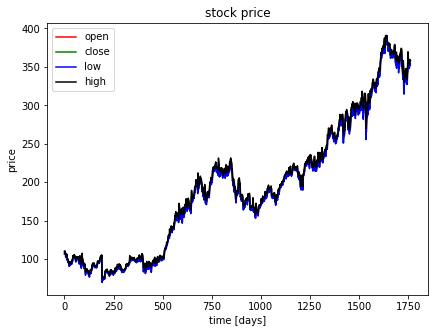

In [0]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df[df.symbol == 'EQIX'].open.values, color='red', label='open')
plt.plot(df[df.symbol == 'EQIX'].close.values, color='green', label='close')
plt.plot(df[df.symbol == 'EQIX'].low.values, color='blue', label='low')
plt.plot(df[df.symbol == 'EQIX'].high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

plt.subplot(1,2,2);
plt.plot(df[df.symbol == 'EQIX'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

# 3. Manipulate data <a class="anchor" id="3-bullet"></a> 
- choose a specific stock
- drop feature: volume
- normalize stock data
- create train, validation and test data sets

In [0]:
# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['close'] = min_max_scaler.fit_transform(df['close'].values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

# choose one stock
df_stock = df[df.symbol == 'EQIX'].copy()
df_stock.drop(['symbol'],1,inplace=True)
df_stock.drop(['volume'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)


df_stock.columns.values =  ['open', 'close', 'low', 'high']
x_train.shape =  (1394, 19, 4)
y_train.shape =  (1394, 4)
x_valid.shape =  (174, 19, 4)
y_valid.shape =  (174, 4)
x_test.shape =  (174, 19, 4)
y_test.shape =  (174, 4)


/home/obabilonia/.conda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


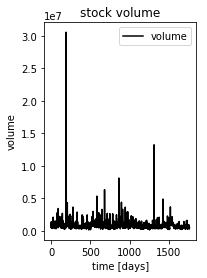

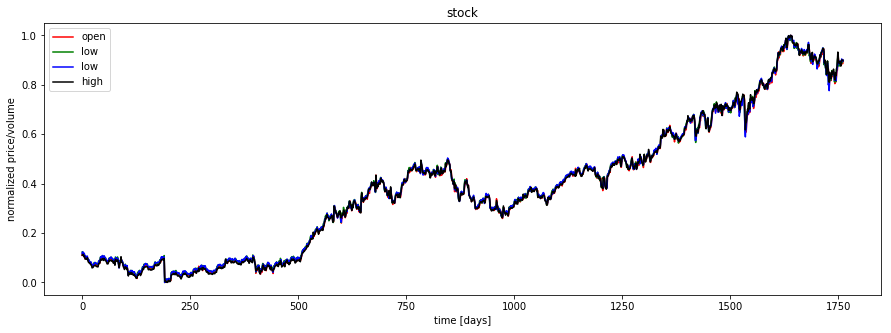

In [0]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

# 4. Model and validate data <a class="anchor" id="4-bullet"></a> 
- RNNs with basic, LSTM, GRU cells


In [0]:
## Basic Cell RNN in tensorflow

index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1 
n_inputs = 4 
n_neurons = 200 
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100 
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
#layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
#          for layer in range(n_layers)]

# use Basic LSTM Cell 
#layers = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu)
#          for layer in range(n_layers)]

# use LSTM Cell with peephole connections
#layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]

# use GRU cell
layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
          for layer in range(n_layers)]
                                                                     
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
                                              
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})
    

0.00 epochs: MSE train/valid = 0.068963/0.319524
4.99 epochs: MSE train/valid = 0.000329/0.001008
9.97 epochs: MSE train/valid = 0.000379/0.001560
14.96 epochs: MSE train/valid = 0.000224/0.000704
19.94 epochs: MSE train/valid = 0.000178/0.000586
24.93 epochs: MSE train/valid = 0.000119/0.000324
29.91 epochs: MSE train/valid = 0.000104/0.000299
34.90 epochs: MSE train/valid = 0.000093/0.000234
39.89 epochs: MSE train/valid = 0.000131/0.000507
44.87 epochs: MSE train/valid = 0.000075/0.000200
49.86 epochs: MSE train/valid = 0.000084/0.000230
54.84 epochs: MSE train/valid = 0.000099/0.000315
59.83 epochs: MSE train/valid = 0.000066/0.000194
64.81 epochs: MSE train/valid = 0.000120/0.000340
69.80 epochs: MSE train/valid = 0.000072/0.000230
74.78 epochs: MSE train/valid = 0.000063/0.000204
79.77 epochs: MSE train/valid = 0.000062/0.000191
84.76 epochs: MSE train/valid = 0.000061/0.000206
89.74 epochs: MSE train/valid = 0.000075/0.000221
94.73 epochs: MSE train/valid = 0.000067/0.000227
99.

# 5. Predictions <a class="anchor" id="5-bullet"></a> 

In [0]:
y_train.shape

(1394, 4)

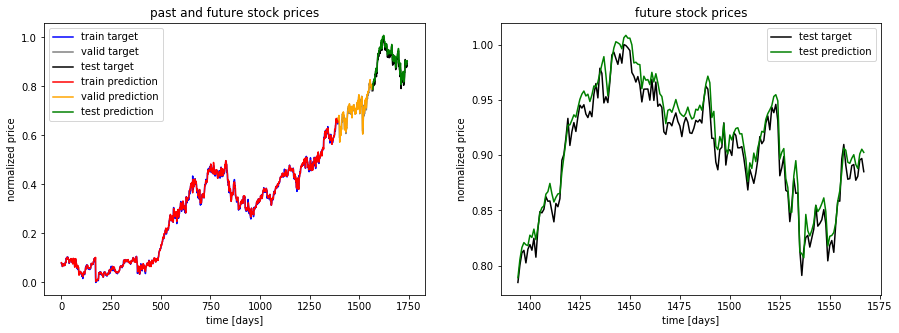

correct sign prediction for close - open price for train/valid/test: 0.55/0.36/0.39


In [0]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');
plt.show()

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))


# Atividade 6

## Manifold Learning And Autoencoders

Author: Alexandru Papiu

The MNIST competition is slowly coming to an end so I figured I'd try something slightly different - let's try to see if we can get some intuition about the geometry and topology of the MNIST dataset.

### Loading required packages and data:

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten, Input
from keras.optimizers import adam
from keras.utils.np_utils import to_categorical

%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


In [0]:
train = pd.read_csv("./ITAu/ZuZu/train.csv")

X_train = train.iloc[:,1:].values
X_train = X_train.reshape(X_train.shape[0], 28, 28) #reshape to rectangular
X_train = X_train/255 #pixel values are 0 - 255 - this makes puts them in the range 0 - 1

y_train = train["label"].values

In [0]:
#define a function that allows us to see the digits:
def show(img):
    plt.imshow(img, cmap = "gray", interpolation = "none")

Let's pick one image to be our default image - just so we have a reference point. We'll call this the **"eight" image** - simply because, well it's an eight:

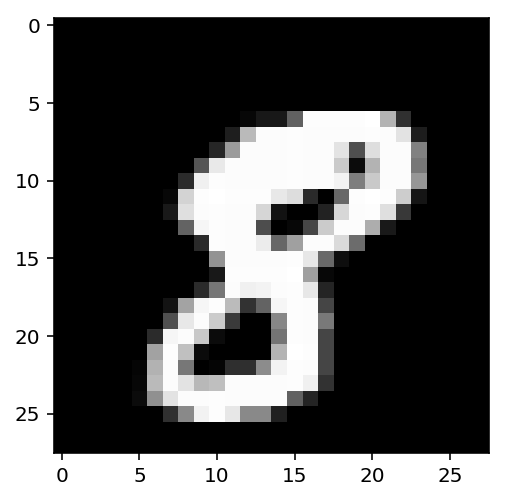

In [0]:
img = X_train[10]
show(img)

In [0]:
pd.DataFrame(img)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.992157,0.992157,1.000000,0.705882,0.188235,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.988235,0.988235,0.992157,0.988235,0.890196,0.113725,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.890196,0.309804,0.870588,0.988235,0.988235,0.505882,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.333333,...,0.792157,0.043137,0.705882,0.988235,0.988235,0.466667,0.0,0.0,0.0,0.0


Ok so our digits are in a space in which every pixel is a variable or a feature. Since there are 28*28 = 784 pixels per image we can thing of the images as sitting in $\mathbb{R}^{784}$ - a real 784 dimensional vector space.

This space is very high dimensional and most dimensionality reduction techniques try to exploit the assumption that not all of these dimension are needed to distinguish between the digits (or more generally extract features or achieve some learning task).

Where does this intuition come from? To see this let's generate a point uniformly at random in the unit 784 dimensional hypercube and see what it looks like. We pick points in the hypercube simply because we normalized the pixel intensities. 

Maybe a 784-hypercube sounds intimidating but it has a very easy mathematical definition: it's the set composed of all  vectors in $\mathbb{R}^{784}$ that have all coordinates less than or equal to one: $$\{x \in \mathbb{R}^{784} | |x_i| < 1\} = [0,1]^{784}$$

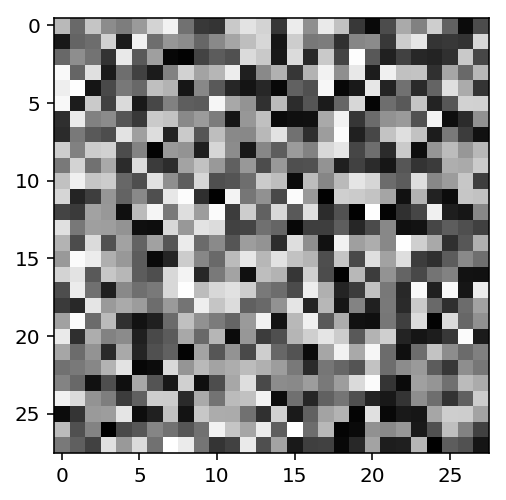

In [0]:
#generating a random 28 by 28 image:
rand_img = np.random.randint(0, 255, (28, 28))
rand_img = rand_img/255.0

show(rand_img)

Doesn't look like anything to me!

We can try to sample at random many times but unless we get extremely lucky all we'll get is static and nothing resembling an actual digit. This is good empirical evidence that the meaningful images - in this case images of digits, are clustered in smaller dimensional subsets in the original 784 dimensional pixel space. This is what is called the **manifold hypothesis**. And the promise is that if we better understand the structure of the manifold we will have an easier time building machine learning systems.

Before we try to see how to figure out the manifold structure let's take a closer look at out space. For example what happens if we start at the point of a digit and start traveling in a random direction? Will we get any meaningful images?

In [0]:
rand_direction = np.random.rand(28, 28) 

### Moving in a random direction away from a digit in the 784 dimensional image space:

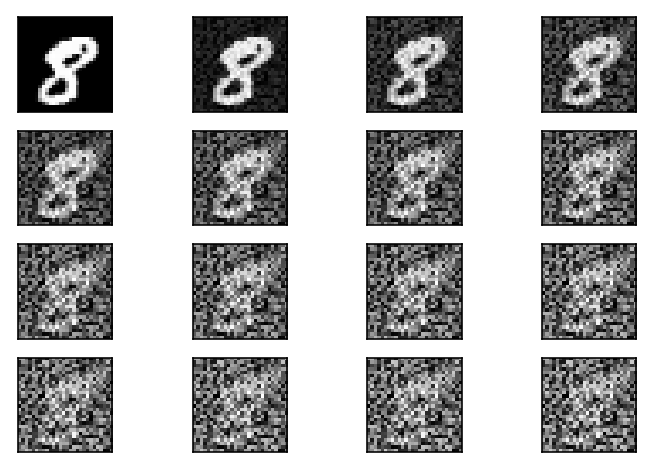

In [0]:
for i in range(16):
    plt.subplot(4,4,i+1)
    show(img + i/4*rand_direction)    
    plt.xticks([])
    plt.yticks([])

We can see that as we move away from the digit, the images we encounter become less and less distinguishable. At first we can still see the eight shape but before we know it we're back in static land.

Perhaps a good analogy here is that of a solar system: the surface of our planets are the manifolds we're interested in, one for each digit. Now say you're on the surface of the earth which is a 2-manifold and you start moving in a random direction (let's assume gravity doesn't exist and you can go through solid objects). If you don't understand the structure of earth you'll quickly find yourself in space or inside the earth. But if you instead move within the local earth (say spherical) coordinates you will stay on the surface and get to see all the cool stuff. 

There are however some differences: first of all we're in a much higher dimensional space and we're not sure how many dimensions we need to capture the structure of the digit subspaces. Secondly these subspaces could be really crazy looking - think for example two donuts entangled in some weird way. You could in fact get from one manifold to another without going into static space as all.

### Our digits' best friends aka Nearest Neighbors:

Another thing to do to understand better the structure of the image space is to look at what images are closest to the "eight" image using some metric. In this case I'll use the sklearn knn wrap with l_2 distance as the metric on the flattened images. 

In [0]:
X_flat = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])

knn = NearestNeighbors(5000)

knn.fit(X_flat[:5000])

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5000, p=2,
         radius=1.0)

In [0]:
distances, neighbors = knn.kneighbors(img.flatten().reshape(1, -1))
neighbors = neighbors[0]
distances = distances[0]

### Histogram of L_2 distances from the "eight" digit:

(array([   8.,   28.,  120.,  408.,  852., 1346., 1257.,  711.,  218.,
          51.]),
 array([ 6.93865358,  7.66124204,  8.38383049,  9.10641895,  9.8290074 ,
        10.55159586, 11.27418432, 11.99677277, 12.71936123, 13.44194968,
        14.16453814]),
 <a list of 10 Patch objects>)

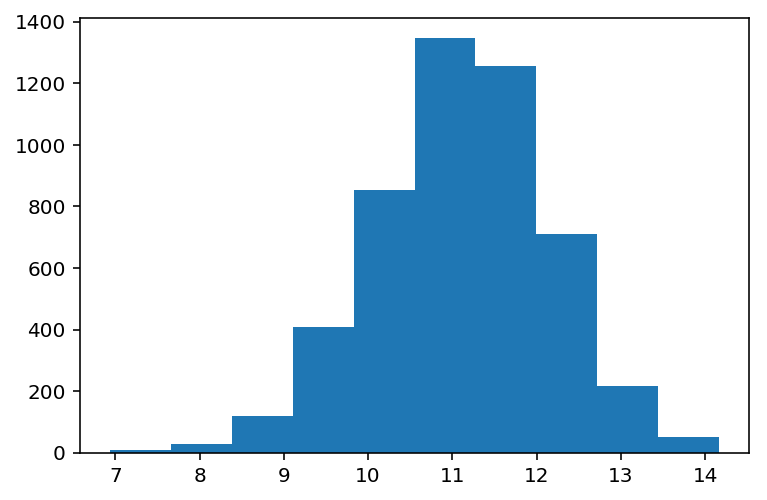

In [0]:
plt.hist(distances[1:])

The distances of the first 5000 images from the "eight" image is roughly normally distributed - in fact it's much more well behaved than I expected. At first I though I'd see multiple modes and a higher variance given that we have different classes. 

### 32 Nearest Neighbors for our "eight" image:

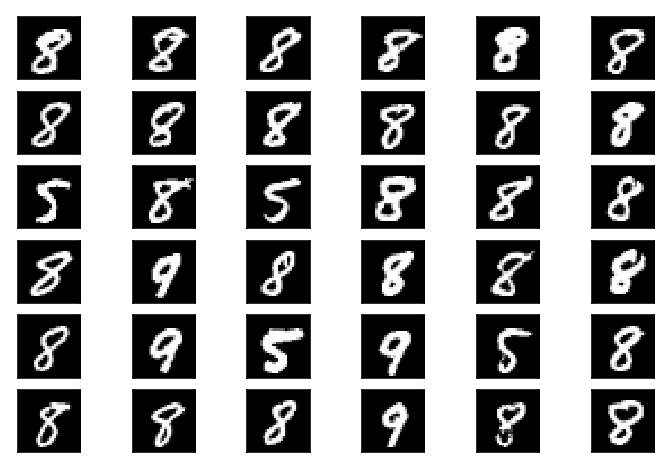

In [0]:
for digit_num, num in enumerate(neighbors[:36]):
    plt.subplot(6,6,digit_num+1)
    grid_data = X_train[num]  # reshape from 1d to 2d pixel array
    show(grid_data)
    plt.xticks([])
    plt.yticks([])

Interesting stuff - most of the neighbors are also eight but not all - we see some five and some nines as well. However all in all it looks like KNN would be a decent way to attack this problem - maybe with 5 or 10 neighbors.

### Learning the manifold with an autoencoder:

Ok so how do we figure out what (combinations of) dimensions in the image space are important? One option would be to hand engineer features - for examples the mean of all pixels is probably a good feature to have. Other worthwhile features would be the slant, and the vertical or horizontal symmetry. 

But we want do to machine learning not hand-craft features because we're lazy and machines tend to better capture important features in messy datasets. There are many ways to try to reduce the dimensionality - hereI am going to use an autoencoder. I like autoencoders because they have a nice intuitive appeal and you can train them relatively fast. 

An **autoencoder ** is a feed- forward neural network who tries to learn a lower dimensional representation of our data. It does that by decreasing the number of layers in the middle of the network and then increasing it back to the dimension of the original image. 

Since the autoencoder is forced to reconstruct the images from a smaller representation it discards any variation that it doesn't find useful. Here is a great description form the [Deep Learning](http://www.deeplearningbook.org/contents/autoencoders.html) book:

"The important principle is that the autoencoder can aﬀord to represent only the variations that are needed to reconstruct training examples. If the data generating distribution concentrates near a low-dimensional manifold, this yields representations that implicitly capture a local coordinate system for this manifold: only the variations tangent to the manifold around x need to correspond to changes in h=f(x)."

Let's build an autoencoder in keras - It will have 3 hidden layers with 64, 2, and 64 units respectively. Our model will compress the image to a 2-dimensional vector and then try to reconstruct it . Note that we don't use the target y at all, instead we use X_flat for both the input and the target i.e. we're doing unsupervised learning.

In [0]:
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)

encoded = Dense(2)(encoded) #keep it linear here.

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(784, activation = 'sigmoid')(decoded)

autoencoder = Model(input=input_img, output=decoded)

/home/obabilonia/.conda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [0]:
autoencoder.compile(optimizer = "adam", loss = "mse")
autoencoder.fit(X_flat, X_flat, batch_size = 128,
                nb_epoch = 10, verbose = 3)

/home/obabilonia/.conda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [0]:
encoder = Model(input = input_img, output = encoded)

#building the decoder:
encoded_input = Input(shape=(2,))
encoded_layer_1 = autoencoder.layers[-2]
encoded_layer_2 = autoencoder.layers[-1]


decoder = encoded_layer_1(encoded_input)
decoder = encoded_layer_2(decoder)
decoder = Model(input=encoded_input, output=decoder)

/home/obabilonia/.conda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':
/home/obabilonia/.conda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


### 2D - representation learned by the autoencoder:

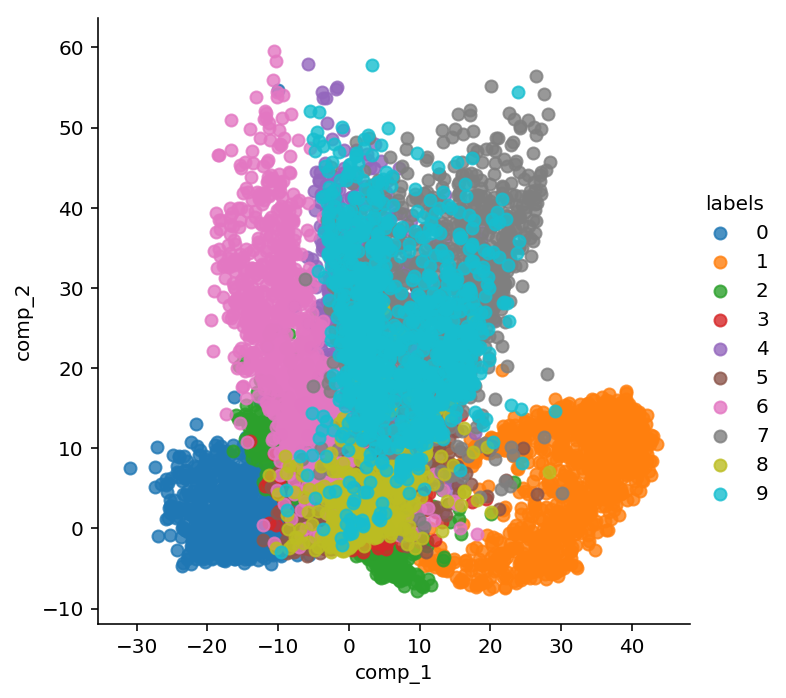

In [0]:
import seaborn as sns

X_proj = encoder.predict(X_flat[:10000])
X_proj.shape

proj = pd.DataFrame(X_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y_train[:10000]
sns.lmplot("comp_1", "comp_2",hue = "labels", data = proj, fit_reg=False)

We can see the autoencoder does a decent job of separating certain classes like 1, 0 and 4. It does better than PCA but is not as good as TSNE. The autoencoder learns a better representation that simpler methods like PCA because it can detect nonlinearities in the data due to its relu activations. In fact if we used linear activation functions and only one hidden layer we would have recovered the PCA case.


Can we recover the images from their 2-dimensional represetation?

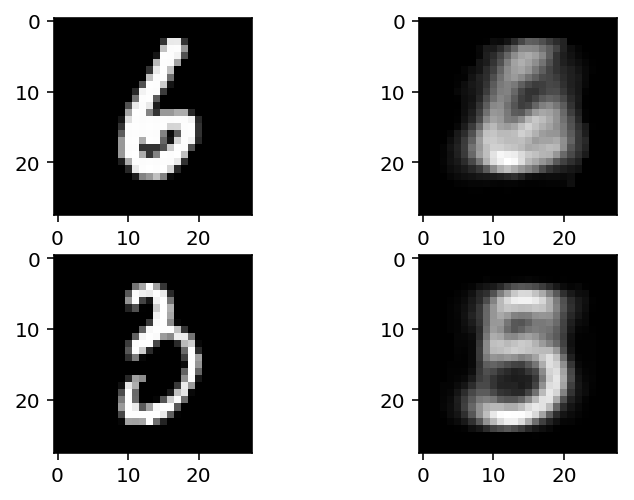

In [0]:

#how well does the autoencoder decode:w1
plt.subplot(2,2,1)
show(X_train[160])
plt.subplot(2,2,2)
show(autoencoder.predict(np.expand_dims(X_train[160].flatten(), 0)).reshape(28, 28))
plt.subplot(2,2,3)
show(X_train[150])
plt.subplot(2,2,4)
show(autoencoder.predict(np.expand_dims(X_train[150].flatten(), 0)).reshape(28, 28))

Not really - the encoding decoding process is quite lossy - but that makes sense since we're converting a 784 dimensional vector into 2 dimensions.

### Generating new digits by moving in the latent 2D - space:

Now the hope is that the new 2-D representation of the data is a good coordinate system for the subspace of the data that is actually meaningful i.e. the digits. One (hand-wavy) way to check this is to see what happens if we sample points in the 2-D representation space and move in various directions - do we get some meaningful change in the decoded image of the path or just noise as we did in the original space?

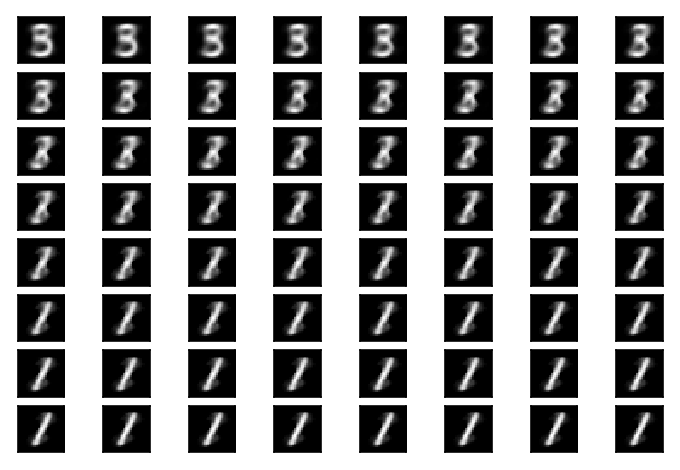

In [0]:
#moving along the x axis:
for i in range(64):
    plt.subplot(8,8,i+1)
    pt = np.array([[i/3,0]])
    show(decoder.predict(pt).reshape((28, 28)))
    plt.xticks([])
    plt.yticks([])

Pretty neat! We see that moving in a given direction in the 2D representation corresponds to staying on the digits manifolds in the original space. We never end up in static space. Sure not all the images are exactly digits but they are all digit-like. You can also clearly see the transition from one class to another.

Note that the way we're generating images here doesn't have very good statistical properties since we have to look at the 2-d plot first. Using a variational autoencoder makes the generative process more rigorous but we'll settle for this.

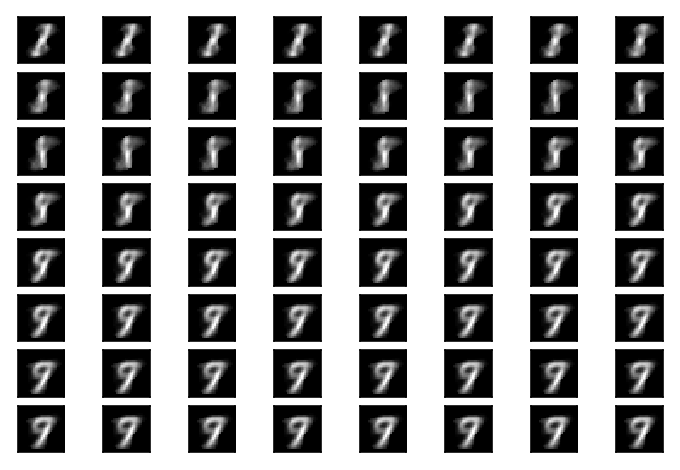

In [0]:
#moving along the y axis:
for i in range(64):
    plt.subplot(8,8,i+1)
    pt = np.array([[10,i/3]])
    show(decoder.predict(pt).reshape((28, 28)))
    plt.xticks([])
    plt.yticks([])

### References:

-  [Autoencoder in Keras](https://blog.keras.io/building-autoencoders-in-keras.html) by Francois Chollet

- [Deep Learning Book Ch 14](http://www.deeplearningbook.org/contents/autoencoders.html) by Ian Goodfellow and Yoshua Bengio and Aaron Courville.